# Multi‑Lab Reasoning Analysis Notebook

This notebook analyzes the merged dataset containing:
- Panel metadata
- CDS outputs
- LLM outputs
- Scoring results

It produces:
- Summary statistics
- Score distributions
- CDS vs LLM comparisons
- Drift and correlation‑detection patterns
- Outlier detection
- Relationship heatmaps

This is the primary analysis notebook for the project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

pd.set_option('display.max_colwidth', None)

DATA_PATH = "../outputs/dataset/merged_dataset.csv"
df = pd.read_csv(DATA_PATH)

df.head()

,panel_id,lab_name_1,value_1,units_1,ref_range_1,category_1,lab_name_2,value_2,units_2,ref_range_2,...,relationship_accuracy_explanation,narrative_drift_score,narrative_drift_explanation,certainty_score,certainty_explanation,mechanistic_score,mechanistic_explanation,structure_score,structure_explanation,total_score
0,P001,Iron,190.0,mcg/dL,60-170,Metabolic,Uric acid,9.2,mg/dL,3.5-7.2,...,"The physiological mechanisms described for each relationship (e.g., uric acid-induced renal vasoconstriction, iron-induced oxidative stress, shared metabolic pathways) are accurate and appropriately qualified based on the strength of evidence.",3,"The output avoids unsupported assumptions by consistently using conditional language and clearly distinguishing between established facts, associations, and areas of ongoing research. It does not overstate causal links.",2,"The output demonstrates excellent use of conditional language ('may indicate,' 'can be,' 'suggests,' 'is considered a risk factor,' 'proposed mechanisms,' 'has been associated,' 'not firmly established,' 'some research suggesting,' 'may reflect') to appropriately reflect the certainty of the information presented.",4,"The output provides good depth of mechanistic reasoning for individual labs (e.g., increased absorption/release/decreased utilization for iron; production/excretion imbalance for uric acid; vascular resistance/cardiac output/arterial elasticity for BP) and for the relationships (e.g., renal vasoconstriction, endothelial dysfunction, oxidative stress, inflammation for relationships).",2,"The output adheres perfectly to the required structure, clearly separating 'A. Individual Lab Explanations' and 'B. Possible Relationships Between Abnormal Labs' with distinct bullet points for each item.",25
1,P002,Creatinine,2.1,mg/dL,0.6-1.3,Renal,BUN,38.0,mg/dL,7-20,...,"All identified relationships are physiologically accurate and correctly described, including the inverse relationship between creatinine and eGFR, the shared mechanism of accumulation, and the utility of the BUN:Cr ratio.",3,"The output avoids unsupported assumptions. It appropriately uses conditional language when discussing potential diagnoses (e.g., Stage 3a CKD, acute kidney injury) and the utility of the BUN:Cr ratio, without making definitive claims beyond what the given labs support.",2,"The output consistently uses appropriate conditional language (""typically indicates,"" ""commonly indicates,"" ""can also be influenced,"" ""falls within the range typically associated,"" ""can also be seen,"" ""can sometimes provide additional clues,"" ""might suggest"") demonstrating a nuanced understanding of diagnostic certainty.",4,"The output provides excellent depth in its mechanistic reasoning. It explains the origin and excretion of creatinine and BUN, how their accumulation relates to GFR, and the physiological basis for the inverse relationship between creatinine and eGFR, and the shared mechanism of accumulation.",2,"The output is very well-structured with clear headings (""A. Individual Lab Explanations,"" ""B. Possible Relationships Between Abnormal Labs"") and bullet points, making it easy to read and understand.",25
2,P003,ALT,110.0,U/L,7-56,Hepatic,AST,95.0,U/L,10-40,...,"Both identified relationships are physiologically accurate. The explanation of how hepatocellular injury compromises bilirubin processing and excretion is correct, as is the summary that all three point to liver dysfunction.",3,"The output strictly adheres to interpreting the provided lab values and their interrelationships without introducing unsupported assumptions, speculative diagnoses, or extraneous information.",2,"The output uses appropriate conditional language throughout (e.g., 'primarily indicate,' 'suggests,' 'can also reflect,' 'strongly points towards,' 'can be compromised,' 'potential underlying') reflecting the interpretive nature of lab results.",4,"The output provides good depth in mechanistic reasoning. It explains why 

## Score Summary

Basic descriptive statistics across all scoring dimensions.

In [2]:
score_cols = [
    'correctness_score', 'completeness_score', 'relationship_detection_score',
    'relationship_accuracy_score', 'narrative_drift_score', 'certainty_score',
    'mechanistic_score', 'structure_score', 'total_score'
]

df[score_cols].describe()

,correctness_score,completeness_score,relationship_detection_score,relationship_accuracy_score,narrative_drift_score,certainty_score,mechanistic_score,structure_score,total_score
count,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
mean,4.0,3.0,4.0,3.0,3.0,2.0,4.0,2.0,25.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,4.0,3.0,4.0,3.0,3.0,2.0,4.0,2.0,25.0
25%,4.0,3.0,4.0,3.0,3.0,2.0,4.0,2.0,25.0
50%,4.0,3.0,4.0,3.0,3.0,2.0,4.0,2.0,25.0
75%,4.0,3.0,4.0,3.0,3.0,2.0,4.0,2.0,25.0
max,4.0,3.0,4.0,3.0,3.0,2.0,4.0,2.0,25.0


## Score Distributions

Visualizing how the model performs across each scoring dimension.

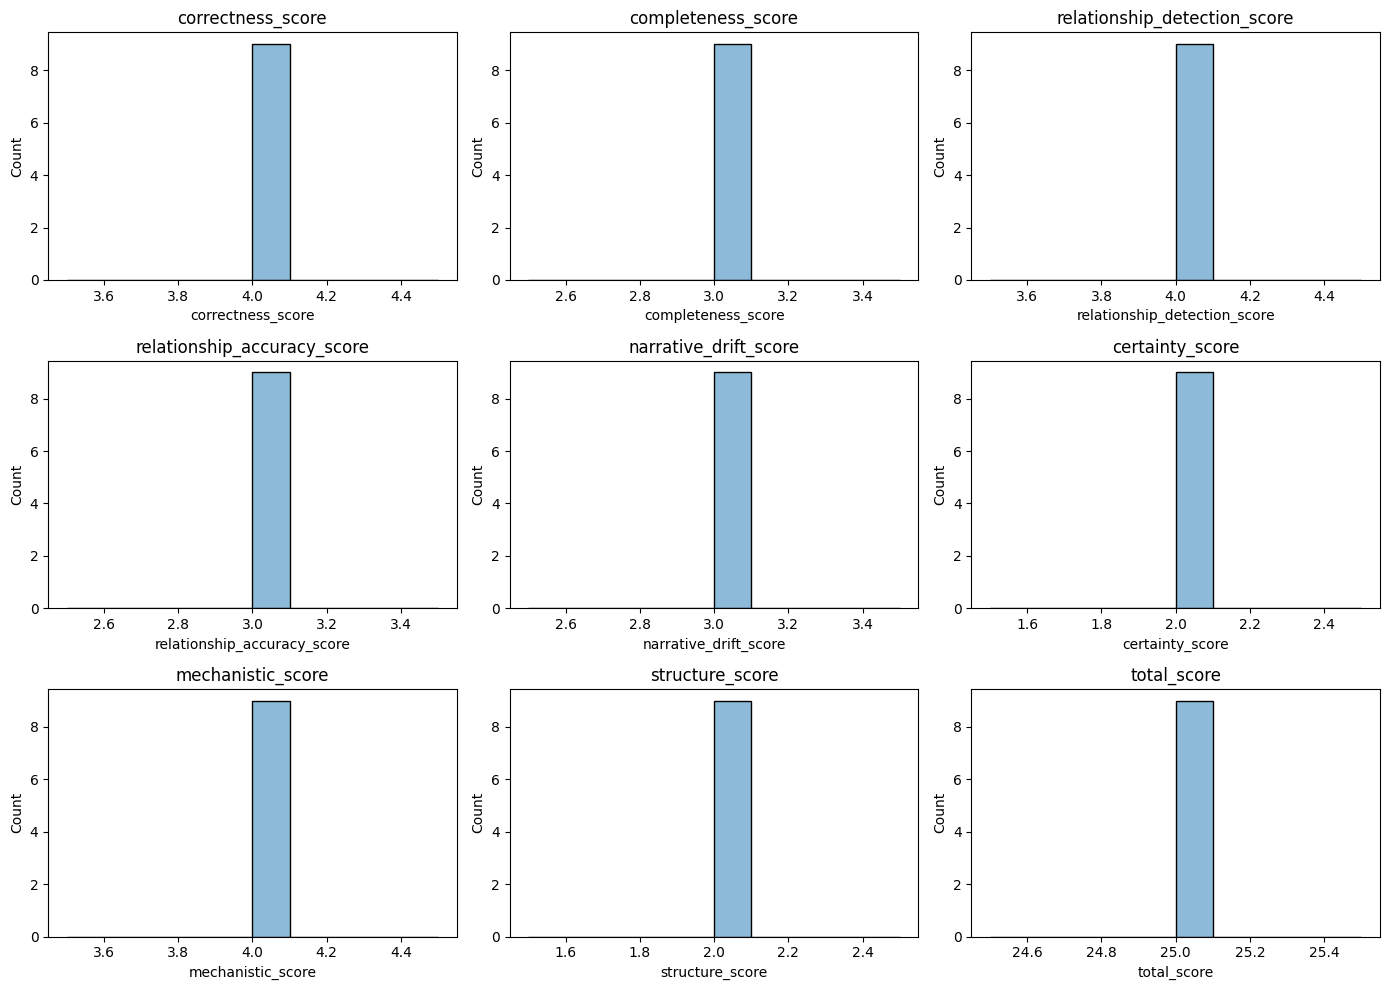

In [4]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(score_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(col)
plt.tight_layout()
plt.show()

## Correlation Matrix of Scores

Shows how different reasoning dimensions relate to each other.

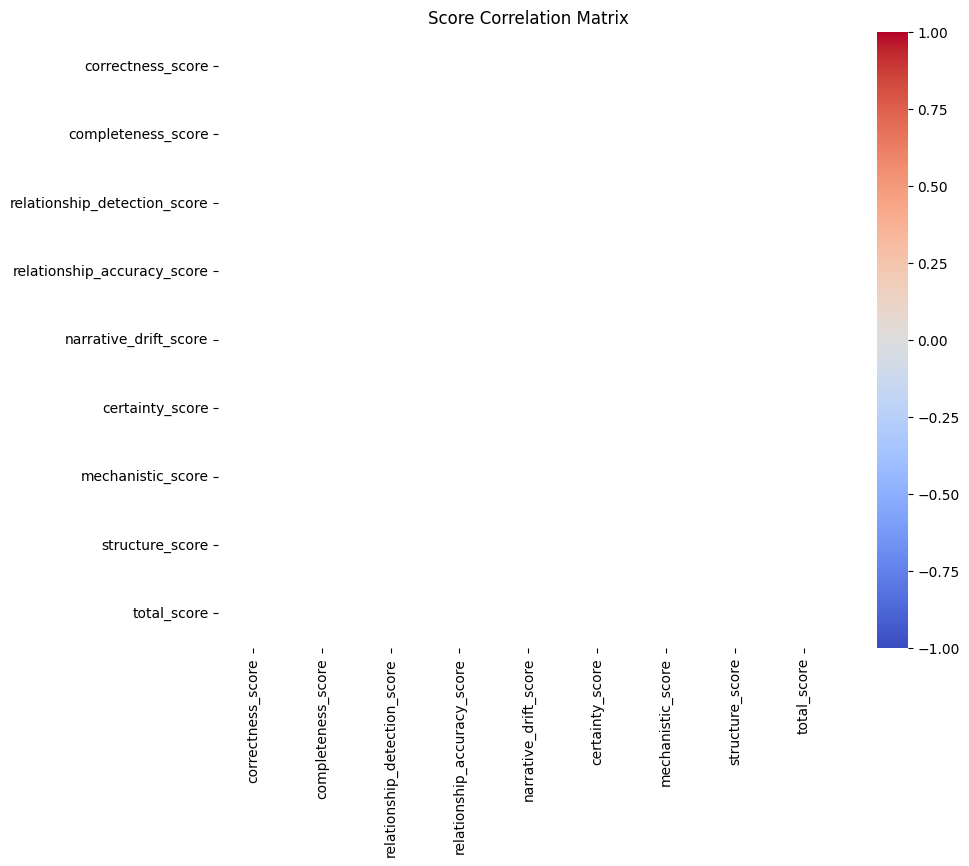

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[score_cols].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Score Correlation Matrix")
plt.show()

## CDS vs LLM Output Length

A proxy for reasoning breadth and verbosity.

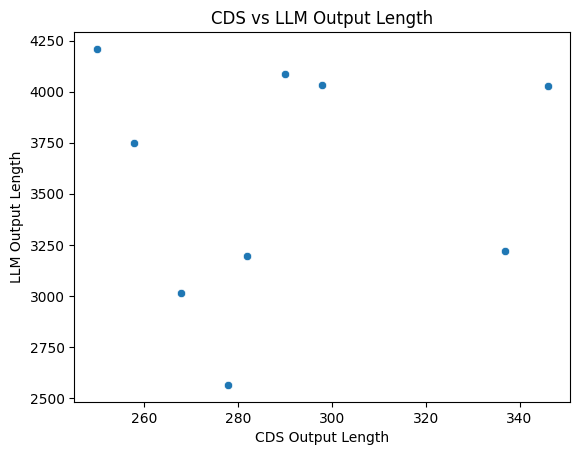

In [6]:
df['llm_length'] = df['llm_output'].fillna('').apply(len)
df['cds_length'] = df['cds_output'].fillna('').apply(len)

sns.scatterplot(data=df, x='cds_length', y='llm_length')
plt.xlabel("CDS Output Length")
plt.ylabel("LLM Output Length")
plt.title("CDS vs LLM Output Length")
plt.show()

## Drift vs Total Score

Shows whether narrative drift correlates with overall performance.

sns.scatterplot(data=df, x='narrative_drift_score', y='total_score')
plt.title("Narrative Drift vs Total Score")
plt.show()

## Relationship Detection vs Mechanistic Depth

This highlights whether the model's ability to detect correlations is tied to deeper physiologic reasoning.

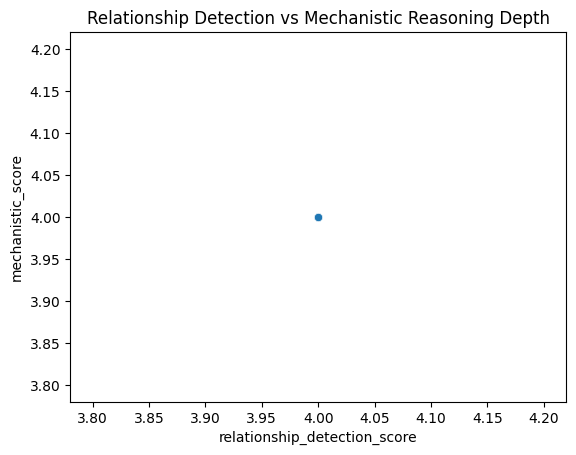

In [8]:
sns.scatterplot(data=df, x='relationship_detection_score', y='mechanistic_score')
plt.title("Relationship Detection vs Mechanistic Reasoning Depth")
plt.show()

## Outlier Panels

Panels with unusually high or low total scores.

In [9]:
df.sort_values('total_score').head(5)

,panel_id,lab_name_1,value_1,units_1,ref_range_1,category_1,lab_name_2,value_2,units_2,ref_range_2,...,narrative_drift_explanation,certainty_score,certainty_explanation,mechanistic_score,mechanistic_explanation,structure_score,structure_explanation,total_score,llm_length,cds_length
0,P001,Iron,190.0,mcg/dL,60-170,Metabolic,Uric acid,9.2,mg/dL,3.5-7.2,...,"The output avoids unsupported assumptions by consistently using conditional language and clearly distinguishing between established facts, associations, and areas of ongoing research. It does not overstate causal links.",2,"The output demonstrates excellent use of conditional language ('may indicate,' 'can be,' 'suggests,' 'is considered a risk factor,' 'proposed mechanisms,' 'has been associated,' 'not firmly established,' 'some research suggesting,' 'may reflect') to appropriately reflect the certainty of the information presented.",4,"The output provides good depth of mechanistic reasoning for individual labs (e.g., increased absorption/release/decreased utilization for iron; production/excretion imbalance for uric acid; vascular resistance/cardiac output/arterial elasticity for BP) and for the relationships (e.g., renal vasoconstriction, endothelial dysfunction, oxidative stress, inflammation for relationships).",2,"The output adheres perfectly to the required structure, clearly separating 'A. Individual Lab Explanations' and 'B. Possible Relationships Between Abnormal Labs' with distinct bullet points for each item.",25,4027,346
1,P002,Creatinine,2.1,mg/dL,0.6-1.3,Renal,BUN,38.0,mg/dL,7-20,...,"The output avoids unsupported assumptions. It appropriately uses conditional language when discussing potential diagnoses (e.g., Stage 3a CKD, acute kidney injury) and the utility of the BUN:Cr ratio, without making definitive claims beyond what the given labs support.",2,"The output consistently uses appropriate conditional language (""typically indicates,"" ""commonly indicates,"" ""can also be influenced,"" ""falls within the range typically associated,"" ""can also be seen,"" ""can sometimes provide additional clues,"" ""might suggest"") demonstrating a nuanced understanding of diagnostic certainty.",4,"The output provides excellent depth in its mechanistic reasoning. It explains the origin and excretion of creatinine and BUN, how their accumulation relates to GFR, and the physiological basis for the inverse relationship between creatinine and eGFR, and the shared mechanism of accumulation.",2,"The output is very well-structured with clear headings (""A. Individual Lab Explanations,"" ""B. Possible Relationships Between Abnormal Labs"") and bullet points, making it easy to read and understand.",25,3015,268
2,P003,ALT,110.0,U/L,7-56,Hepatic,AST,95.0,U/L,10-40,...,"The output strictly adheres to interpreting the provided lab values and their interrelationships without introducing unsupported assumptions, speculative diagnoses, or extraneous information.",2,"The output uses appropriate conditional language throughout (e.g., 'primarily indicate,' 'suggests,' 'can also reflect,' 'strongly points towards,' 'can be compromised,' 'potential underlying') reflecting the interpretive nature of lab results.",4,"The output provides good depth in mechanistic reasoning. It explains why ALT/AST rise (cellular injury, enzyme release), the broader distribution of AST, and the detailed bilirubin metabolism pathway (heme catabolism, uptake, conjugation, excretion) and points of impairment. The relationships also explain the 'how' (e.g., how damaged liver cells compromise bilirubin processing).",2,"The output perfectly adheres to the required structure, clearly separating 'A. Individual Lab Explanations' and 'B. Possible Relationships Between Abnormal Labs' with appropriate sub-headings.",25,2564,278
3,P004,Glucose,168.0,mg/dL,70-99,Metabolic,Triglycerides,285.0,mg/dL,<150,...,"The output adheres strictly to the interpretation of the provided lab values and their known relationships, avoiding unsu

In [10]:
df.sort_values('total_score').tail(5)

,panel_id,lab_name_1,value_1,units_1,ref_range_1,category_1,lab_name_2,value_2,units_2,ref_range_2,...,narrative_drift_explanation,certainty_score,certainty_explanation,mechanistic_score,mechanistic_explanation,structure_score,structure_explanation,total_score,llm_length,cds_length
4,P005,TSH,6.8,uIU/mL,0.4-4.0,Endocrine,LDL,165.0,mg/dL,<100,...,"The output avoids unsupported assumptions, sticking to established clinical knowledge and research findings. It uses appropriate caveats when mechanisms are not fully understood or when relationships are research-supported rather than universally recognized clinical guidelines.",2,"Appropriate conditional language is used throughout, reflecting the level of certainty in interpretations and relationships (e.g., 'suggests,' 'may not be producing,' 'can lead to,' 'research suggests,' 'may involve,' 'potentially heightened').",4,"The depth of physiologic and mechanistic reasoning is excellent. It explains the underlying biological processes for individual labs (e.g., TSH's role in stimulating thyroid, CRP as an acute-phase reactant) and their interrelationships in detail (e.g., thyroid hormone regulation of LDL receptors, inflammation's role in atherosclerosis and LDL oxidation).",2,"The output is well-organized into clear sections for 'A. Individual Lab Explanations' and 'B. Possible Relationships Between Abnormal Labs,' enhancing readability and logical flow. The 'Overall Context' provides a good summary.",25,3747,258
5,P006,Potassium,2.9,mmol/L,3.5-5.1,Electrolyte,Magnesium,1.4,mg/dL,1.7-2.2,...,"The output strictly adheres to interpreting the provided lab values and their interrelationships, avoiding any unsupported assumptions, definitive diagnoses, or treatment recommendations. The caveat for calcium further exemplifies this by highlighting a necessary piece of missing information.",2,"The output consistently uses appropriate conditional language such as 'may suggest,' 'can impair,' 'can lead to,' and 'often mediated by,' reflecting a suitable level of diagnostic uncertainty and clinical reasoning.",4,"The output provides excellent depth in its mechanistic reasoning. For each relationship, it details specific physiological pathways and molecular mechanisms (e.g., Na+/K+-ATPase pump, ROMK channels, PTH synthesis/secretion/resistance, 25-hydroxyvitamin D-1α-hydroxylase) that explain the observed electrolyte imbalances.",2,"The output perfectly adheres to the requested structure, clearly separating 'A. Individual Lab Explanations' and 'B. Possible Relationships Between Abnormal Labs' with appropriate headings and bullet points.",25,4032,298
6,P007,WBC,15.2,K/uL,4.0-11.0,Hematologic,Neutrophils,82.0,%,40-60,...,"The output avoids unsupported assumptions, consistently grounding its statements in established medical knowledge. It uses cautious language and even includes a section acknowledging the possibility of unrelated causes, demonstrating a lack of narrative drift.",2,"The output demonstrates excellent use of conditional language throughout, employing phrases such as 'commonly indicates,' 'can also be seen,' 'typically accompanies,' 'strongly suggests,' 'frequently observed,' 'can lead to,' 'is theoretically possible,' and 'less likely.'",4,"The mechanistic reasoning is deep and thorough, particularly for the relationship between WBC/Neutrophils and Lactate. It explains the cascade from acute infection/inflammation to systemic vasodilation, microcirculatory dysfunction, tissue hypoperfusion, inadequate oxygen delivery, anaerobic metabolism, and increased lactate production.",2,"The output adheres perfectly to the required structure, clearly separating 'A. Individual Lab Explanations' and 'B. Possible Relationships Between Abnormal Labs' as requested.",25,3196,282
7,P008,Platelets,92.0,K/uL,150-450,Hematologic,INR,1.9,NaN,0.8-1.2,...,"The output demonstrates minimal narrative drift. It presents multiple plausible etiologies and relationships without prematurely concluding a single dia

## Panel Inspection Utility

A helper function to inspect a specific panel’s:
- metadata
- CDS output
- LLM output
- scoring breakdown

In [11]:
def inspect_panel(panel_id):
    row = df[df['panel_id'] == panel_id].iloc[0]
    print("=== PANEL METADATA ===")
    display(row.filter(regex='lab|panel'))

    print("\n=== CDS OUTPUT ===")
    print(textwrap.fill(row['cds_output'] or '', width=100))

    print("\n=== LLM OUTPUT ===")
    print(textwrap.fill(row['llm_output'] or '', width=100))

    print("\n=== SCORING ===")
    display(row[score_cols])

inspect_panel("P001")

=== PANEL METADATA ===


panel_id             P001
lab_name_1           Iron
lab_name_2      Uric acid
lab_name_3    Systolic BP
Name: 0, dtype: object


=== CDS OUTPUT ===
Iron: Elevated iron may indicate iron overload, hemochromatosis, excessive supplementation, or
reduced utilization. BP: Elevated systolic blood pressure is consistent with hypertension and
increases cardiovascular risk. Uric Acid: Elevated uric acid may indicate gout, decreased renal
clearance, increased purine turnover, or metabolic imbalance.

=== LLM OUTPUT ===
**A. Individual Lab Explanations**  *   **Iron: 190 mcg/dL (reference 60-170)**     *   This
elevated serum iron level (hyperferremia) may indicate increased iron absorption from the gut,
increased release of iron from cellular stores (e.g., due to cell damage or hemolysis), or decreased
iron utilization. It can be a transient finding after iron-rich meals or supplementation, or it may
suggest a state of iron overload, though a single serum iron measurement is not sufficient to
diagnose iron overload without further evaluation (e.g., ferritin, transferrin saturation).  *
**Uric acid: 9.2 mg/dL (reference 3

correctness_score                4
completeness_score               3
relationship_detection_score     4
relationship_accuracy_score      3
narrative_drift_score            3
certainty_score                  2
mechanistic_score                4
structure_score                  2
total_score                     25
Name: 0, dtype: object